### Problem Statement

You have been provided with a dataset named **`"cancer_data.csv"`**, which includes medical and lifestyle information for 1500 patients. The dataset is designed to predict the presence of cancer based on various features. The dataset comprises the following columns:

- `age:` Integer values representing the patient's age, ranging from 20 to 80.
- `gender:` Binary values representing gender, where 0 indicates Male and 1 indicates Female.
- `bmi:` Continuous values representing Body Mass Index, ranging from 15 to 40.
- `smoking:` Binary values indicating smoking status, where 0 means No and 1 means Yes.
- `genetic_risk:` Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.
- `physical_activity:` Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.
- `alcohol_intake:` Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.
- `cancer_history:` Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.
- `diagnosis:` Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

  
Your task is to use this dataset to build and compare the performance of Decision Tree and Random Forest models to predict the presence of cancer. Additionally, explore various parameters of the RandomForestClassifier to enhance model performance.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset)

**Import Necessary Libraries**

In [1]:
#import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### Task 1: Data Preparation and Exploration

1. Import the data from the `"cancer_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset.

In [2]:
# Step 1: Import the data from the "cancer_data.csv" file and store it in a variable 'df'
df = pd.read_csv("datasets\\cancer_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.sample(7)

(1500, 9)


,age,gender,bmi,smoking,genetic_risk,physical_activity,alcohol_intake,cancer_history,diagnosis
151,31,0,28.738238,0,2,0.725223,1.386292,0,1
7,40,0,20.301121,1,0,4.929827,2.247995,1,0
360,60,1,23.173290,0,1,5.120886,1.973877,0,0
295,43,1,30.323490,0,0,8.245171,2.323447,0,0
328,37,1,29.758692,1,1,7.413087,3.268890,0,1
313,79,0,31.404046,0,1,4.657256,0.990654,0,0
1125,24,0,19.980382,0,0,7.497257,1.070881,0,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1500 non-null   int64  
 1   gender             1500 non-null   int64  
 2   bmi                1500 non-null   float64
 3   smoking            1500 non-null   int64  
 4   genetic_risk       1500 non-null   int64  
 5   physical_activity  1500 non-null   float64
 6   alcohol_intake     1500 non-null   float64
 7   cancer_history     1500 non-null   int64  
 8   diagnosis          1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [7]:
# Step 4: Check for any missing values in the dataset
df.isna().sum()

age                  0
gender               0
bmi                  0
smoking              0
genetic_risk         0
physical_activity    0
alcohol_intake       0
cancer_history       0
diagnosis            0
dtype: int64

### Task 2: Model Training Using Decision Tree Classifier

1. Select the features `(age, gender, bmi, smoking, genetic_risk, physical_activity, alcohol_intake, cancer_history)` and the target variable `(diagnosis)` for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Decision Tree Classifier model using the training data.
4. Make predictions on the test set using the trained model.
5. Evaluate the model using a classification report and print the report.

In [8]:
df["diagnosis"].value_counts()

diagnosis
0    943
1    557
Name: count, dtype: int64

In [9]:
# Step 1: Select the features and target variable for modeling
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Step 2: Split the data into training and test sets with a test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)

In [11]:
# Step 3: Initialize and train a Decision Tree Classifier model using the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Step 4: Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

# Step 5: Evaluate the model using a classification report and print the report
class_report = classification_report(y_pred=y_pred, y_true=y_test)
train_acc = model.score(X_train, y_train)
print("train acc: ", train_acc)
print("*"*30)
print(class_report)

train acc:  1.0
******************************
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       233
           1       0.92      0.86      0.89       142

    accuracy                           0.92       375
   macro avg       0.92      0.91      0.91       375
weighted avg       0.92      0.92      0.92       375



### Task 3: Model Training Using Random Forest Classifier

1. Initialize and train a Random Forest Classifier model with 25 estimators using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.

In [12]:
# Step 1: Initialize and train a Random Forest Classifier model with 25 estimators using the training data
model_est = RandomForestClassifier(n_estimators=25)
model_est.fit(X_train, y_train)

y_pred_est = model_est.predict(X_test)

# Step 5: Evaluate the model using a classification report and print the report
class_report_est = classification_report(y_pred=y_pred_est, y_true=y_test)
train_acc_est = model_est.score(X_train, y_train)
print("train acc: ", train_acc_est)
print("*"*30)
print(class_report_est)


train acc:  0.9982222222222222
******************************
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       233
           1       0.92      0.86      0.89       142

    accuracy                           0.92       375
   macro avg       0.92      0.91      0.91       375
weighted avg       0.92      0.92      0.92       375



### Task 4: Exploring Various Parameters in Random Forest Classifier

1. Train a Random Forest model with the following parameters:
   - n_estimators = 50
   - max_features = "log2"
   - criterion = "entropy"
   - bootstrap = False
   - max_depth = 15
   - min_samples_split = 5
   - min_samples_leaf = 3

Learn about these parameters here: [scikit-learn RandomForestClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


--------------------------------------------------------------------------------------------------------------------------------------------------------
2. Evaluate the model using a classification report and print the report.

In [13]:
# Step 1: Train a Random Forest model with specified parameters
model_sp = RandomForestClassifier(n_estimators=50, max_features='log2', criterion="entropy", bootstrap=False, max_depth=15, min_samples_split=5, min_samples_leaf=3)
model_sp.fit(X_train, y_train)

# Step 2: Make predictions on the test set using the trained model
y_pred_sp = model_sp.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report
class_report_sp = classification_report(y_pred=y_pred_sp, y_true=y_test)
train_acc_sp = model_sp.score(X_train, y_train)
print("train acc: ", train_acc_sp)
print("*"*30)
print(class_report_sp)

train acc:  0.9848888888888889
******************************
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       233
           1       0.92      0.87      0.89       142

    accuracy                           0.92       375
   macro avg       0.92      0.91      0.91       375
weighted avg       0.92      0.92      0.92       375



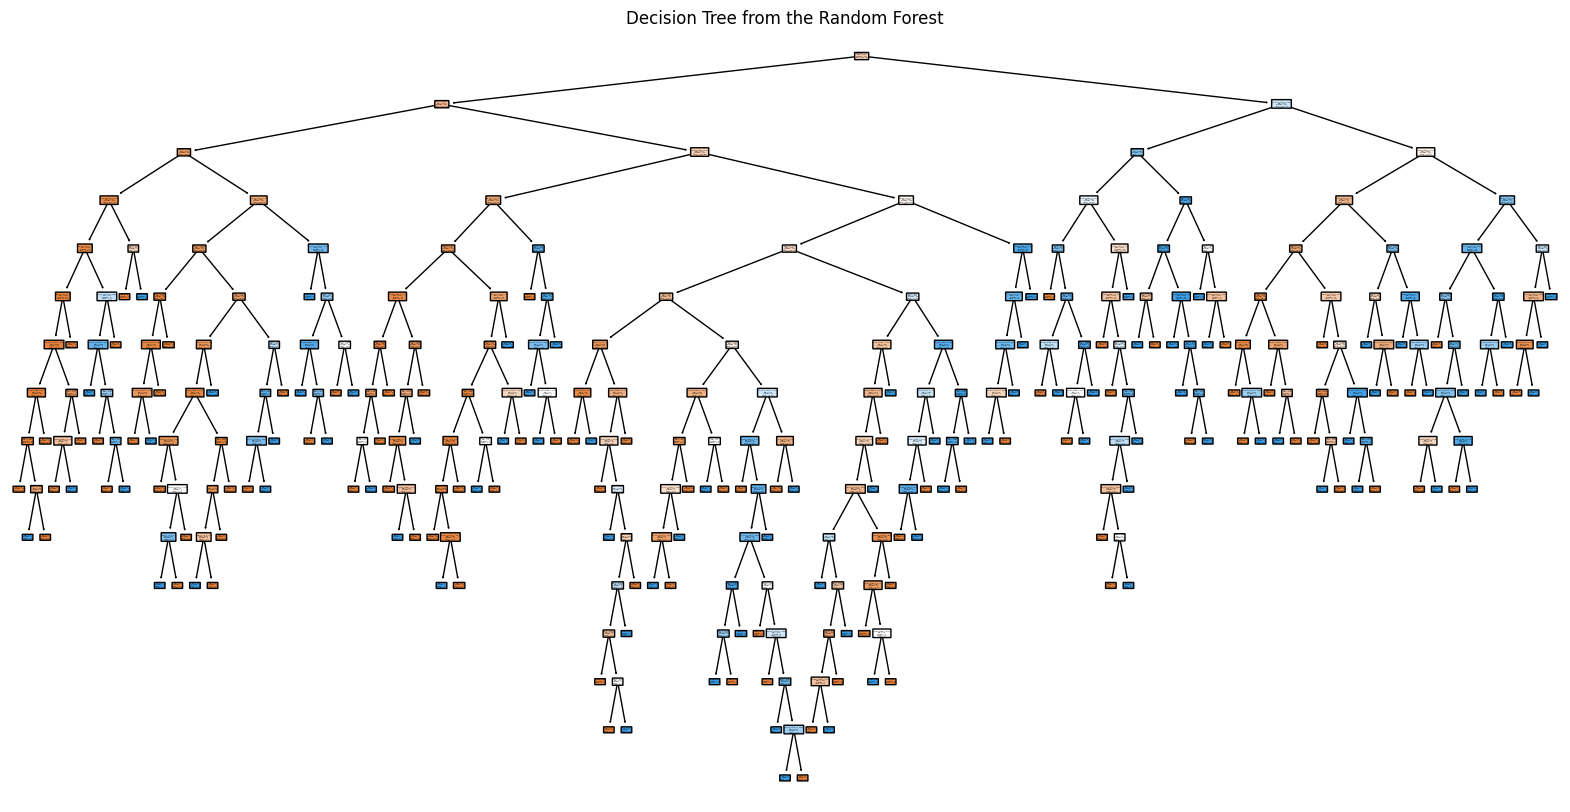

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plot the tree using the plot_tree function from sklearn
tree = model.estimators_[0]
plt.figure(figsize=(20,10))  # Set figure size to make the tree more readable
plot_tree(tree, 
          feature_names=X.columns,  # Use the feature names from the dataset
          class_names=model.classes_.astype(str),  # Use class names (species names)
          filled=True,              # Fill nodes with colors for better visualization
          rounded=True)             # Rounded edges for nodes
plt.title("Decision Tree from the Random Forest")
plt.show()